Let's import the required libraries. Here, Linear Regression has been implemented from scratch and no external libraries like `tensorflow` or `pytorch` have been employed.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Having imported the libraries, we load the *comma seperated values* file into a `pandas` DataFrame. We can also use `np.loadtxt()` for the same.</br>
The .csv file has been created using Python context-manager coupled with `csv` library. Numpy's `linspace()` method has been used to generate the Features.

In [4]:
data = pd.read_csv("numpydataset.csv")
data.head()  

,Features,Targets
0,-10.000000,-12.494938
1,-9.959920,-16.144029
2,-9.919840,-16.175059
3,-9.879760,-23.393130
4,-9.839679,-12.531222


We aim to minimise the distance between the data and the line after each epoch. An *epoch* is a single iteration over a dataset of features.</br>
The Error function is represented as, $ E = \frac{1}{n} \sum_{i=0}^{n} (y_i - \hat{y})^2 $ where $ y_i $ and $ \hat{y} $ are the actual and the predicted values respectively.

In [6]:
def MSE(points, m, b):
    total_err = 0
    samples = len(points)
    
    for i in range(samples):
        x = points.iloc[i].Features
        y = points.iloc[i].Targets
        total_err += (y - (m * x + b)) ** 2
    return total_err / samples

In [7]:
MSE(data, m=0, b=0)

182.94204589695937

We get a loss of around 183. Our aim is to minimise this value. Hence, we perform the elegant GRADIENT DESCENT Algorithm. Extensively used in Machine Learning, this process involves finding the **local minimum** of a function. The sole idea behind this algorithm is, provided a certain learning rate $ \gamma $, to take iterative steps in the direction of $ -\nabla{E} $ (gradient) to minimise the cost function.

In [8]:
def gradient_descent(m_new, b_new, points, step_size):
    samples = len(points)
    m_gradient = 0
    b_gradient = 0
    
    for i in range(samples):
        x = points.iloc[i].Features
        y = points.iloc[i].Targets
        m_gradient += -(2/samples) * x * (y - (m_new * x + b_new))
        b_gradient += -(2/samples) * (y - (m_new * x + b_new))
        
    m = m_new - step_size * m_gradient
    b = b_new - step_size * b_gradient
    return m, b
    

It's the time for action!

In [12]:
m, b = 0, 0
L = 0.001    # initial learning rate, can be adjusted later
epochs = 100

for epoch in range(1, epochs+1):
    m, b = gradient_descent(m, b, data, L)
    print(f"Epoch {epoch}, m: {m}, b:{b}")
#     if not(epoch % 10):
#         print(f"Epoch {epoch}, m: {m}, b:{b}")
print(m, b)


Epoch 1, m: 0.136583491906185, b:0.010312358814106729
Epoch 2, m: 0.26402492243027265, b:0.02060409291058524
Epoch 3, m: 0.3829362050996419, b:0.030875243538870792
Epoch 4, m: 0.4938882957025642, b:0.041125851865899773
Epoch 5, m: 0.5974139337480966, b:0.05135595897627469
Epoch 6, m: 0.694010200429459, b:0.06156560587242887
Epoch 7, m: 0.7841409053730308, b:0.07175483347479074
Epoch 8, m: 0.8682388136330048, b:0.08192368262194788
Epoch 9, m: 0.946707723624676, b:0.0920721940708107
Epoch 10, m: 1.019924405973618, b:0.10220040849677581
Epoch 11, m: 1.0882404125901861, b:0.11230836649388898
Epoch 12, m: 1.1519837646556652, b:0.12239610857500792
Epoch 13, m: 1.211460527624978, b:0.1324636751719646
Epoch 14, m: 1.2669562808083688, b:0.1425111066357274
Epoch 15, m: 1.318737488588302, b:0.15253844323656268
Epoch 16, m: 1.3670527798555105, b:0.16254572516419627
Epoch 17, m: 1.412134141807439, b:0.1725329925279746
Epoch 18, m: 1.454198033841142, b:0.18250028535702537
Epoch 19, m: 1.493446426889

Let's check our final loss value. Is it way lesser than the initial value i.e. 183?

In [13]:
MSE(data, m, b)

34.815768029154874

35 is definitely better but we can improve our *regression* model more. Let's adjust the **learning** rate and change it to `0.01`.

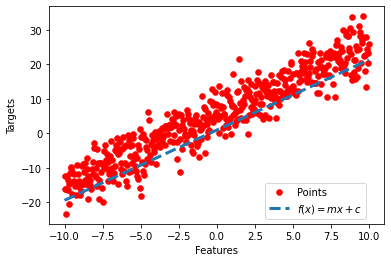

In [15]:
fig, ax = plt.subplots(1,1)

ax.scatter(data.Features, 
           data.Targets, 
           color="red", 
           linewidths=0.5, 
           label="Points")
ax.plot(data.Features, 
        [m * x + b for x in data.Features], 
        linewidth=3, 
        linestyle="dashed", 
        label="$ f(x) = mx+c $")

ax.legend(loc="lower right", bbox_to_anchor=(.96, 0.0))
ax.set_xlabel("Features")
ax.set_ylabel("Targets")

plt.show()

In [16]:
m, b = 0, 0
L = 0.01   # new learning rate
epochs = 100

for epoch in range(1, epochs+1):
    m, b = gradient_descent(m, b, data, L)
    print(f"Epoch {epoch}, m: {m}, b:{b}")
#     if not(epoch % 10):
#         print(f"Epoch {epoch}, m: {m}, b:{b}")
print(m, b)


Epoch 1, m: 1.3658349190618497, b:0.10312358814106728
Epoch 2, m: 1.817463699913964, b:0.20418470451931323
Epoch 3, m: 1.9667998699352043, b:0.3032245985699943
Epoch 4, m: 2.0161795654332098, b:0.4002836947396617
Epoch 5, m: 2.032507520858402, b:0.4954016089859357
Epoch 6, m: 2.0379065441953887, b:0.5886171649472842
Epoch 7, m: 2.0396917923929903, b:0.6799684097894059
Epoch 8, m: 2.0402821049232593, b:0.7694926297346849
Epoch 9, m: 2.040477298445292, b:0.8572263652810584
Epoch 10, m: 2.040541841393459, b:0.9432054261165045
Epoch 11, m: 2.040563183250068, b:1.0274649057352416
Epoch 12, m: 2.0405702401766015, b:1.110039195761604
Epoch 13, m: 2.0405725736292624, b:1.1909619999874392
Epoch 14, m: 2.0405733452118064, b:1.2702663481287577
Epoch 15, m: 2.0405736003443105, b:1.3479846093072496
Epoch 16, m: 2.040573684706762, b:1.4241485052621718
Epoch 17, m: 2.040573712602162, b:1.4987891232979957
Epoch 18, m: 2.0405737218260915, b:1.571936928973103
Epoch 19, m: 2.0405737248760887, b:1.6436217

Let's calculate the new loss value.

In [17]:
MSE(data, m, b)

17.469113719731904

Bingo! We were able to minimize the loss. Our **Gradient Descent** algorithm proved to be very efficient.</br>
Let's quickly perform 2-D plotting using our favourite `matplotlib` library.

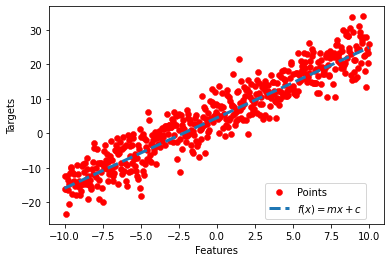

In [18]:
fig, ax = plt.subplots(1,1)

ax.scatter(data.Features, 
           data.Targets, 
           color="red", 
           linewidths=0.5, 
           label="Points")
ax.plot(data.Features, 
        [m * x + b for x in data.Features], 
        linewidth=3, 
        linestyle="dashed", 
        label="$ f(x) = mx+c $")

ax.legend(loc="lower right", bbox_to_anchor=(.96, 0.0))
ax.set_xlabel("Features")
ax.set_ylabel("Targets")

plt.show()